# Python Codes for MFAP Assignment #1 
___________________________________
Zhaoyang Zhang, 2024

If you have questions, please email me at zz5160@nyu.edu

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from sympy import symbols, exp, diff, simplify
from scipy.stats import skew, kurtosis

### Question 1a

In [11]:
# mgf of the Poisson

omg, s = symbols('omg s')
mgf = exp(omg*(exp(s)-1))
print('mgf = ', mgf)
print(' ')

eta1 = simplify(diff(mgf, s, 1).subs(s, 0))
eta2 = simplify(diff(mgf, s, 2).subs(s, 0))
eta3 = simplify(diff(mgf, s, 3).subs(s, 0))
eta4 = simplify(diff(mgf, s, 4).subs(s, 0))


print('eta1 =', eta1)
print('eta2 =', eta2)
print('eta3 =', eta3)
print('eta4 =', eta4)

mgf =  exp(omg*(exp(s) - 1))
 
eta1 = omg
eta2 = omg*(omg + 1)
eta3 = omg*(omg**2 + 3*omg + 1)
eta4 = omg*(omg**3 + 6*omg**2 + 7*omg + 1)


### Question 1b

In [12]:
# cgf of the Poisson

cgf = omg*(exp(s)-1)
print('cgf = ', cgf)
print(' ')

kappa1 = simplify(diff(cgf, s, 1).subs(s, 0))
kappa2 = simplify(diff(cgf, s, 2).subs(s, 0))
kappa3 = simplify(diff(cgf, s, 3).subs(s, 0))
kappa4 = simplify(diff(cgf, s, 4).subs(s, 0))

print('kappa1 =', kappa1)
print('kappa2 =', kappa2)
print('kappa3 =', kappa3)
print('kappa4 =', kappa4)


cgf =  omg*(exp(s) - 1)
 
kappa1 = omg
kappa2 = omg
kappa3 = omg
kappa4 = omg


### Question 1f

In [13]:
# central mgf of the Poisson
mgfc = exp(-omg*s) * exp(omg*(exp(s)-1))
print('mgfc = ', mgfc)
print(' ')

m1 = simplify(diff(mgfc, s, 1).subs(s, 0))
m2 = simplify(diff(mgfc, s, 2).subs(s, 0))
m3 = simplify(diff(mgfc, s, 3).subs(s, 0))
m4 = simplify(diff(mgfc, s, 4).subs(s, 0))

print('m1 =', m1)
print('m2 =', m2)
print('m3 =', m3)
print('m4 =', m4)

mgfc =  exp(-omg*s)*exp(omg*(exp(s) - 1))
 
m1 = 0
m2 = omg
m3 = omg
m4 = omg*(3*omg + 1)


### Question 1g

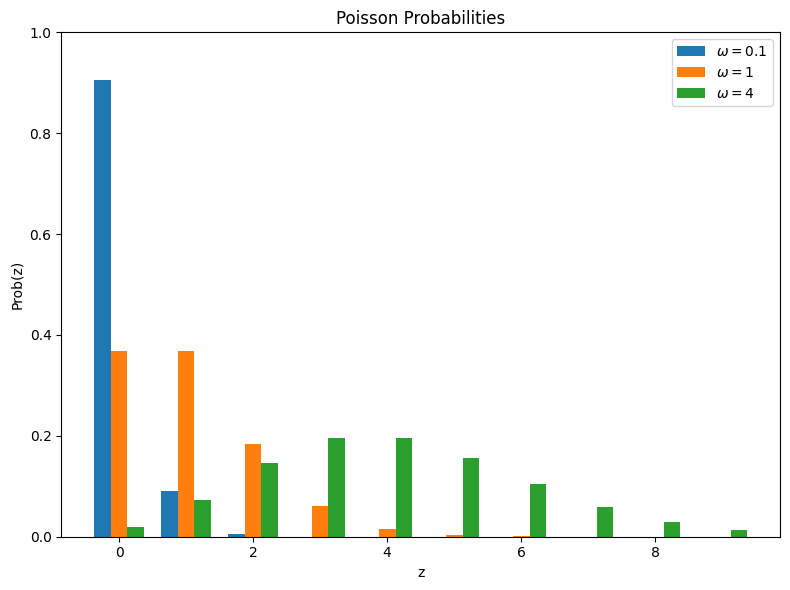

In [17]:
omega = [0.1, 1, 4]
z = np.arange(10)  # z from 0 to 9
p = np.zeros((10, 3))

for j in range(10):
    for i in range(3):
        p[j, i] = np.exp(-omega[i]) * omega[i]**(j) / factorial(j)

# Plotting the Poisson probabilities
bar_width = 0.25
x = z
plt.figure(figsize=(8,6))
plt.bar(x - bar_width, p[:, 0], width=bar_width, label=r'$\omega = 0.1$')
plt.bar(x, p[:, 1], width=bar_width, label=r'$\omega = 1$')
plt.bar(x + bar_width, p[:, 2], width=bar_width, label=r'$\omega = 4$')
plt.legend()
plt.xlabel('z')
plt.ylabel('Prob(z)')
plt.ylim(0, 1)
plt.title('Poisson Probabilities')
plt.tight_layout()
plt.show()

### Question 1h

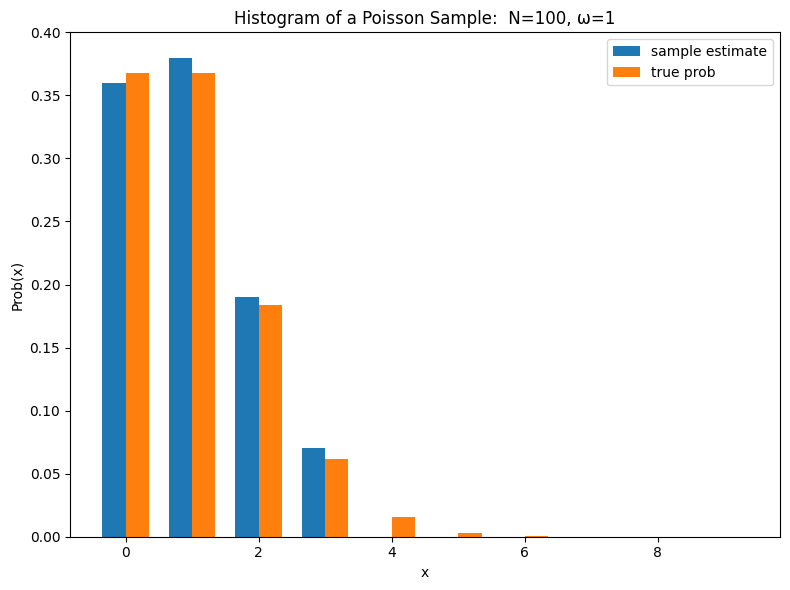

In [18]:
# Generate 100 Poisson random variables with omega=1
np.random.seed(123)  # For reproducibility
x = np.random.poisson(1, 100)

# Count frequencies for x = 0 to 9
sum_counts = np.zeros(10)
for xi in x:
    if xi < 10:
        sum_counts[xi] += 1

sum_counts = sum_counts / 100  # Relative frequencies

# Get true probabilities for omega=1
omega = 1
z = np.arange(10)
p = np.exp(-omega) * omega**z / factorial(z)

# Plotting the histogram
width = 0.35
plt.figure(figsize=(8,6))
plt.bar(z - width/2, sum_counts, width=width, label='sample estimate')
plt.bar(z + width/2, p, width=width, label='true prob')
plt.legend()
plt.xlabel('x')
plt.ylabel('Prob(x)')
plt.ylim(0, 0.4)
plt.title('Histogram of a Poisson Sample:  N=100, ω=1')
plt.tight_layout()
plt.show()

### Question 3


In [21]:
# Set parameters
nobs = 200
np.random.seed(1999)
z = np.random.randn(nobs)

# part a
print('(a)')
zbar = np.sum(z) / nobs
print('zbar =', zbar)
moments = np.sum(np.column_stack((z, (z - zbar)**2, (z - zbar)**3, (z - zbar)**4)), axis=0) / nobs
print('moments =', moments)

# part b
print(' ')
print('(b)')
mean_z = [np.mean(z), zbar]
print('mean_z =', mean_z)

std_z = [np.std(z, ddof=1), np.sqrt(moments[1])]
print('std_z =', std_z)

compare2 = [np.std(z, ddof=1), np.sqrt(moments[1] * nobs / (nobs - 1))]
print('compare2 =', compare2)

print(' ')
skw_z = [skew(z, bias=False), moments[2] / moments[1]**(1.5)]
print('skw_z =', skw_z)

print(' ')
krt_z = [kurtosis(z, bias=False, fisher=False), moments[3] / moments[1]**2]
print('krt_z =', krt_z)


# part c
print(' ')
print('(c)')
y = 20 - 2 * z

ybar = np.sum(y) / nobs
print('y_bar =', ybar)

moments_y = np.sum(np.column_stack((y, (y - ybar)**2, (y - ybar)**3, (y - ybar)**4)), axis=0) / nobs
print('moments_y =', moments_y)

mean_y = [np.mean(y), ybar]
print('mean_y =', mean_y)

std_y = [np.std(y, ddof=1), np.sqrt(moments_y[1])]
print('std_y =', std_y)

compare2 = [np.std(y, ddof=1), np.sqrt(moments_y[1] * nobs / (nobs - 1))]
print('compare2 =', compare2)

print(' ')
skw_y = [skew(y, bias=False), moments_y[2] / moments_y[1]**(1.5)]
print('skw_y =', skw_y)

print(' ')
krt_y = [kurtosis(y, bias=False, fisher=False), moments_y[3] / moments_y[1]**2]
print('krt_y =', krt_y)

# part d
print(' ')
print('(d)')
nobs = 20000
np.random.seed(1999)
x = np.random.randn(nobs)
xbar = np.sum(x) / nobs
moments = np.sum(np.column_stack((x, (x - xbar)**2, (x - xbar)**3, (x - xbar)**4)), axis=0) / nobs
print('xbar =', xbar)
print('moments =', moments)

(a)
zbar = -0.03790043591694701
moments = [-0.03790044  0.90632427  0.02645469  2.36283099]
 
(b)
mean_z = [-0.03790043591694701, -0.03790043591694701]
std_z = [0.954399637247146, 0.952010648175532]
compare2 = [0.954399637247146, 0.9543996372471462]
 
skw_z = [0.030892538463691707, 0.030660360033047777]
 
krt_z = [2.903973826080868, 2.876506989177485]
 
(c)
y_bar = 20.07580087183389
moments_y = [20.07580087  3.6252971  -0.21163752 37.80529577]
mean_y = [20.07580087183389, 20.07580087183389]
std_y = [1.908799274494292, 1.904021296351064]
compare2 = [1.908799274494292, 1.9087992744942923]
 
skw_y = [-0.030892538463687554, -0.030660360033043572]
 
krt_y = [2.903973826080868, 2.876506989177486]
 
(d)
xbar = 0.003023970217774118
moments = [ 0.00302397  0.98051848 -0.00481117  2.87947984]
